In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import Polygon
from shapely.geometry import MultiPolygon
import math
import time

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
nbdata = gpd.read_file("nyc_mappluto_23v1_unclipped_shp/MapPLUTO_UNCLIPPED.shp")

In [4]:
nbdata.head()

,Borough,Block,Lot,CD,BCT2020,BCTCB2020,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,PolicePrct,HealthCent,HealthArea,Sanitboro,SanitDistr,SanitSub,Address,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,Overlay1,Overlay2,SPDist1,SPDist2,SPDist3,LtdHeight,SplitZone,BldgClass,LandUse,Easements,OwnerType,OwnerName,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,AreaSource,NumBldgs,NumFloors,UnitsRes,UnitsTotal,LotFront,LotDepth,BldgFront,BldgDepth,Ext,ProxCode,IrrLotCode,LotType,BsmtCode,AssessLand,AssessTot,ExemptTot,YearBuilt,YearAlter1,YearAlter2,HistDist,Landmark,BuiltFAR,ResidFAR,CommFAR,FacilFAR,BoroCode,BBL,CondoNo,Tract2010,XCoord,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLA,PFIRM15_FL,Version,DCPEdited,Latitude,Longitude,Notes,Shape_Leng,Shape_Area,geometry
0,MN,1,101,101,1000100,10001001001,1,1001,02,1,10004,E007,1,15,8200,NaN,NaN,NaN,1 LIBERTY ISLAND,R3-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,P7,08,0,X,U S GOVT LAND & BLDGS,541886,541886,541886,0,0,0,0,0,0,541886,2,10,0.0,0,0,500.00,1046.00,0.0,0.0,N,0,Y,5,0,4225950.0,13720050.0,13720050.0,1900,0,0,Individual Landmark,INDIVIDUAL LANDMARK,1.00,0.5,0.0,1.0,1,1.000010e+09,0,0001,971677,190636,16a,NaN,199 999,10101,NaN,0.000000e+00,NaN,1,NaN,1,23v1,NaN,40.689920,-74.045337,NaN,0.0,523721.101365,"POLYGON ((972409.690 190685.560, 972447.310 19..."
1,MN,1,111,101,1000500,10005001003,5,1000,02,1,10004,E007,1,15,8100,1,01,3B,ANDES ROAD,R3-2,NaN,NaN,NaN,NaN,NaN,GI,NaN,NaN,NaN,N,Y4,08,0,NaN,GOVERNORS ISLAND CORPORATION,64450,47580,47580,0,0,1420,0,0,0,46160,2,2,3.0,0,1,0.00,0.00,0.0,0.0,N,0,N,5,1,870089.0,3903847.0,0.0,0,0,0,NaN,NaN,0.74,0.5,0.0,1.0,1,1.000010e+09,0,0005,979359,191727,16a,NaN,1,1,NaN,1.000010e+09,09/01/2022,1,1,1,23v1,NaN,40.692922,-74.017637,NaN,0.0,64450.947606,"POLYGON ((979185.332 191646.482, 979184.678 19..."
2,MN,1,112,101,1000500,10005001003,5,1000,02,1,10004,E007,1,15,8100,1,01,3B,ANDES ROAD,R3-2,NaN,NaN,NaN,NaN,NaN,GI,NaN,NaN,NaN,N,Y4,08,0,NaN,GOVERNORS ISLAND CORPORATION,7224,8445,8445,0,0,0,0,0,0,8445,2,1,0.0,0,1,0.00,0.00,0.0,0.0,N,0,N,5,1,97538.0,170346.0,0.0,0,0,0,NaN,NaN,1.17,0.5,0.0,1.0,1,1.000010e+09,0,0005,979162,191729,16a,NaN,1,1,NaN,1.000010e+09,09/01/2022,1,1,1,23v1,NaN,40.692927,-74.018348,NaN,0.0,7225.247082,"POLYGON ((979185.332 191646.482, 979141.322 19..."
3,MN,1,401,101,1031703,10317030002,317.03,0001,NaN,1,0,NaN,0,0,0,NaN,NaN,NaN,JOE DIMAGGIO HIGHWAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U0,07,0,X,UNAVAILABLE OWNER,246896,0,0,0,0,0,0,0,0,0,7,0,0.0,0,0,0.00,0.00,0.0,0.0,NaN,0,N,0,5,0.0,0.0,0.0,1949,0,0,NaN,NaN,0.00,0.0,0.0,0.0,1,1.000010e+09,0,031703,978453,199512,12b,NaN,1 99 999,10101,NaN,0.000000e+00,NaN,4,1,1,23v1,t,40.714289,-74.020911,NaN,0.0,246895.790205,"POLYGON ((979340.404 199175.516, 977511.423 19..."
4,MN,2,1,101,1000900,10009001022,9,1025,02,1,10004,L015,1,15,7700,1,01,1B,4 SOUTH STREET,M1-4,NaN,NaN,NaN,NaN,NaN,LM,NaN,NaN,NaN,N,Y7,07,0,C,NYC DEPARTMENT OF SMALL BUSINESS SERVICES,209215,280000,280000,0,0,0,0,0,0,280000,2,1,5.0,0,1,314.28,564.84,268.0,210.0,N,1,Y,2,0,18818100.0,31203000.0,31203000.0,1908,2006,2006,Individual Landmark,NaN,1.34,0.0,2.0,6.5,1,1.000020e+09,0,0009,980670,194440,12b,NaN,101N100,10101,NaN,1.000020e+09,08/07/2012,1,1,1,23v1,t,40.700369,-74.012911,NaN,0.0,209284.446757,"POLYGON ((980948.418 194202.587, 980872.955 19..."


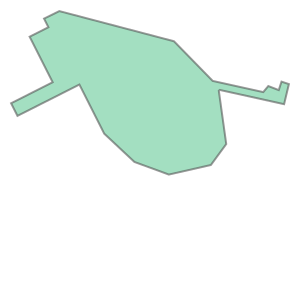

In [5]:
nbdata.iloc[0].geometry

In [6]:
nbdata.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [7]:
# nbdata.plot()

In [8]:
merged = pd.read_csv("./pluto_rodent_merged.csv")
merged.head()

C:\Users\admin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,borough,block,lot,bldgclass,landuse,lotarea,numbldgs,numfloors,unitsres,unitstotal,lotfront,lotdepth,proxcode,lottype,bsmtcode,assesstot,yearbuilt,yearalter1,yearalter2,histdist,landmark,borocode,bbl,xcoord,ycoord,latitude,longitude,INSPECTION_TYPE,JOB_TICKET_OR_WORK_ORDER_ID,JOB_ID,JOB_PROGRESS,BBL,HOUSE_NUMBER,STREET_NAME,ZIP_CODE,X_COORD,Y_COORD,LATITUDE,LONGITUDE,BOROUGH,INSPECTION_DATE,RESULT,APPROVED_DATE,LOCATION
0,0,BX,2286,24,A5,1.0,1666.0,1.0,2.0,1.0,1.0,16.67,100.0,2.0,5.0,1.0,41700.0,1910.0,0.0,0.0,NaN,NaN,2,2.022860e+09,1006348.0,234769.0,40.811035,-73.920172,Initial,12703280,PC6957136,1,2.022860e+09,426,EAST 142 STREET,10454.0,1006348.0,234769.0,40.811273,-73.920171,Bronx,2019-12-27 15:49:08,Passed,2019-12-31 10:32:11,"(40.811272694814, -73.920170703712)"
1,1,BX,2286,24,A5,1.0,1666.0,1.0,2.0,1.0,1.0,16.67,100.0,2.0,5.0,1.0,41700.0,1910.0,0.0,0.0,NaN,NaN,2,2.022860e+09,1006348.0,234769.0,40.811035,-73.920172,Initial,11576347,PC6904906,1,2.022860e+09,426,EAST 142 STREET,10454.0,1006348.0,234769.0,40.811273,-73.920171,Bronx,2017-04-10 13:20:28,Passed,2017-04-21 15:11:22,"(40.811272694814, -73.920170703712)"
2,2,BX,2286,24,A5,1.0,1666.0,1.0,2.0,1.0,1.0,16.67,100.0,2.0,5.0,1.0,41700.0,1910.0,0.0,0.0,NaN,NaN,2,2.022860e+09,1006348.0,234769.0,40.811035,-73.920172,Initial,11757166,PC6641714,1,2.022860e+09,426,EAST 142 STREET,10454.0,1006353.0,234794.0,40.811273,-73.920171,Bronx,2011-08-09 14:55:42,Passed,2011-08-12 09:35:51,"(40.811272694814, -73.920170703712)"
3,3,BX,2286,24,A5,1.0,1666.0,1.0,2.0,1.0,1.0,16.67,100.0,2.0,5.0,1.0,41700.0,1910.0,0.0,0.0,NaN,NaN,2,2.022860e+09,1006348.0,234769.0,40.811035,-73.920172,Initial,13334039,PC7810869,1,2.022860e+09,426,EAST 142 STREET,10454.0,NaN,NaN,40.811273,-73.920171,Bronx,2022-02-23 09:34:16,Passed,2022-02-24 15:15:25,"(40.811272694814, -73.920170703712)"
4,4,BX,2286,24,A5,1.0,1666.0,1.0,2.0,1.0,1.0,16.67,100.0,2.0,5.0,1.0,41700.0,1910.0,0.0,0.0,NaN,NaN,2,2.022860e+09,1006348.0,234769.0,40.811035,-73.920172,Initial,11648101,PC6571013,1,2.022860e+09,426,EAST 142 STREET,10454.0,1006353.0,234794.0,40.811273,-73.920171,Bronx,2010-05-21 15:11:34,Passed,2010-05-27 13:19:14,"(40.811272694814, -73.920170703712)"


In [9]:
cols_needed = [
    "bbl",
    "JOB_ID"
]
merged = merged[cols_needed]

In [10]:
nbdata = pd.merge(nbdata, merged, left_on="BBL", right_on="bbl", how="inner")
nbdata.head()

,Borough,Block,Lot,CD,BCT2020,BCTCB2020,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,PolicePrct,HealthCent,HealthArea,Sanitboro,SanitDistr,SanitSub,Address,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,Overlay1,Overlay2,SPDist1,SPDist2,SPDist3,LtdHeight,SplitZone,BldgClass,LandUse,Easements,OwnerType,OwnerName,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,AreaSource,NumBldgs,NumFloors,UnitsRes,UnitsTotal,LotFront,LotDepth,BldgFront,BldgDepth,Ext,ProxCode,IrrLotCode,LotType,BsmtCode,AssessLand,AssessTot,ExemptTot,YearBuilt,YearAlter1,YearAlter2,HistDist,Landmark,BuiltFAR,ResidFAR,CommFAR,FacilFAR,BoroCode,BBL,CondoNo,Tract2010,XCoord,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLA,PFIRM15_FL,Version,DCPEdited,Latitude,Longitude,Notes,Shape_Leng,Shape_Area,geometry,bbl,JOB_ID
0,MN,1,101,101,1000100,10001001001,1,1001,02,1,10004,E007,1,15,8200,NaN,NaN,NaN,1 LIBERTY ISLAND,R3-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,P7,08,0,X,U S GOVT LAND & BLDGS,541886,541886,541886,0,0,0,0,0,0,541886,2,10,0.0,0,0,500.00,1046.00,0.0,0.0,N,0,Y,5,0,4225950.0,13720050.0,13720050.0,1900,0,0,Individual Landmark,INDIVIDUAL LANDMARK,1.00,0.5,0.0,1.0,1,1.000010e+09,0,0001,971677,190636,16a,NaN,199 999,10101,NaN,0.000000e+00,NaN,1,NaN,1,23v1,NaN,40.689920,-74.045337,NaN,0.0,523721.101365,"POLYGON ((972409.690 190685.560, 972447.310 19...",1.000010e+09,PC6070625
1,MN,1,101,101,1000100,10001001001,1,1001,02,1,10004,E007,1,15,8200,NaN,NaN,NaN,1 LIBERTY ISLAND,R3-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,P7,08,0,X,U S GOVT LAND & BLDGS,541886,541886,541886,0,0,0,0,0,0,541886,2,10,0.0,0,0,500.00,1046.00,0.0,0.0,N,0,Y,5,0,4225950.0,13720050.0,13720050.0,1900,0,0,Individual Landmark,INDIVIDUAL LANDMARK,1.00,0.5,0.0,1.0,1,1.000010e+09,0,0001,971677,190636,16a,NaN,199 999,10101,NaN,0.000000e+00,NaN,1,NaN,1,23v1,NaN,40.689920,-74.045337,NaN,0.0,523721.101365,"POLYGON ((972409.690 190685.560, 972447.310 19...",1.000010e+09,PC6070625
2,MN,2,1,101,1000900,10009001022,9,1025,02,1,10004,L015,1,15,7700,1,01,1B,4 SOUTH STREET,M1-4,NaN,NaN,NaN,NaN,NaN,LM,NaN,NaN,NaN,N,Y7,07,0,C,NYC DEPARTMENT OF SMALL BUSINESS SERVICES,209215,280000,280000,0,0,0,0,0,0,280000,2,1,5.0,0,1,314.28,564.84,268.0,210.0,N,1,Y,2,0,18818100.0,31203000.0,31203000.0,1908,2006,2006,Individual Landmark,NaN,1.34,0.0,2.0,6.5,1,1.000020e+09,0,0009,980670,194440,12b,NaN,101N100,10101,NaN,1.000020e+09,08/07/2012,1,1,1,23v1,t,40.700369,-74.012911,NaN,0.0,209284.446757,"POLYGON ((980948.418 194202.587, 980872.955 19...",1.000020e+09,PC8022121
3,MN,2,1,101,1000900,10009001022,9,1025,02,1,10004,L015,1,15,7700,1,01,1B,4 SOUTH STREET,M1-4,NaN,NaN,NaN,NaN,NaN,LM,NaN,NaN,NaN,N,Y7,07,0,C,NYC DEPARTMENT OF SMALL BUSINESS SERVICES,209215,280000,280000,0,0,0,0,0,0,280000,2,1,5.0,0,1,314.28,564.84,268.0,210.0,N,1,Y,2,0,18818100.0,31203000.0,31203000.0,1908,2006,2006,Individual Landmark,NaN,1.34,0.0,2.0,6.5,1,1.000020e+09,0,0009,980670,194440,12b,NaN,101N100,10101,NaN,1.000020e+09,08/07/2012,1,1,1,23v1,t,40.700369,-74.012911,NaN,0.0,209284.446757,"POLYGON ((980948.418 194202.587, 980872.955 19...",1.000020e+09,PC6105553
4,MN,2,1,101,1000900,10009001022,9,1025,02,1,10004,L015,1,15,7700,1,01,1B,4 SOUTH STREET,M1-4,NaN,NaN,NaN,NaN,NaN,LM,NaN,NaN,NaN,N,Y7,07,0,C,NYC DEPARTMENT OF SMALL BUSINESS SERVICES,209215,280000,280000,0,0,0,0,0,0,280000,2,1,5.0,0,1,314.28,564.84,268.0,210.0,N,1,Y,2,0,18818100.0,31203000.0,31203000.0,1908,2006,2006,Individual Landmark,NaN,1.34,0.0,2.0,6.5,1,1.000020e+09,0,0009,980670,194440,12b,NaN,101N100,10101,NaN,1.000020e+09,08/07/2012,1,1,1,23v1,t,40.700369,-74.012911,NaN,0.0,209284.446757,"POLYGON ((980948.418 194202.587, 980872.955 19...",1.000020e+09,PC6761035


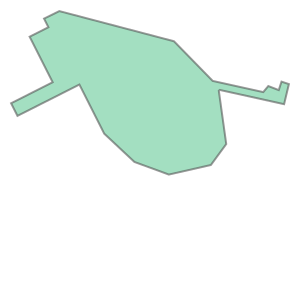

In [11]:
nbdata.iloc[0].geometry

In [ ]:
nbdata.plot(column='JOB_ID', cmap='Reds', legend=True, figsize=(20, 20))

C:\Users\admin\Anaconda3\lib\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
